<h1 align="center">7.4 String Manipulation

<b>Python built-in string methods

A  comma-separated  string  can  be  broken  into  pieces  with split

    split is often combined with strip to trim whitespace (including line breaks)

In [20]:
val='a , b'
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b']

These  substrings  could  be  concatenated  together  with  a  two-colon  delimiter  using join:

In [21]:
'::'.join(pieces)
'a::b::guido'

'a::b::guido'

Other methods are concerned with locating substrings. 

Using Python’s in keyword is the best way to detect a substring, though index and find can also be used

    Note  the  difference  between  find  and  index  is  that  index  raises  an  exception  if  
    the string isn’t found (versus returning –1)

In [22]:
'a' in val


True

In [23]:
val.find('a')

0

In [24]:
val.index('a')

0

count returns the number of occurrences of a particular substring

In [25]:
val.count('a')

1

replace  will  substitute  occurrences  of  one  pattern  for  another.  

It  is  commonly  used to delete patterns, too, by passing an empty string

In [26]:
val.replace(',', '')

'a  b'

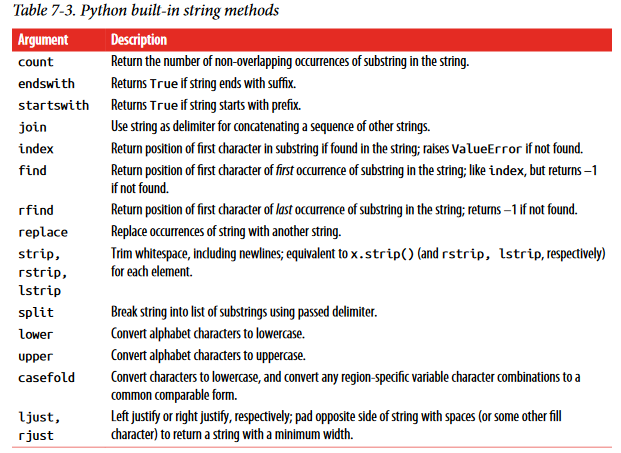

<b>Regular Expressions

A  single  expression,  commonly  called  a  regex,  is  a  stringformed  according  to  the  regular  expression  language.

The  re  module  functions  fall  into  three  categories:  

    pattern  matching
    substitution
    splitting
    
The regex describing one or more whitespace charactersis \s+

In [27]:
import re

In [28]:
text = "foo    bar\t baz  \tqux"

In [29]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

When you call re.split('\s+', text), the regular expression is first compiled, 
and then its split method is called on the passed text. 

You can compile the regex yourself with re.compile, forming a reusable regex object

    Creating  a  regex  object  with  re.compile  is  highly  recommended  if  you  intend  to apply the 
    same expression to many strings; doing so will save CPU cycles

In [30]:
regex = re.compile('\s+')

In [31]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

If, instead, you wanted to get a list of all patterns matching the regex, you can use the findall method

In [32]:
regex.findall(text)

['    ', '\t ', '  \t']

To avoid unwanted escaping with \ in a regular expression, use rawstring literals like r'C:\x' instead of the equivalent 'C:\\x'

match  and  search  are  closely  related  to  findall.  
While  findall  returns  all  matchesin  a  string,  search  returns  only  the  first  match.  More  rigidly,  match only  matches  at the beginning of the string.

re.IGNORECASE makes the regex case-insensitive

In [35]:
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
regex = re.compile(pattern, flags=re.IGNORECASE)

text = """Dave dave@google.com
        Steve steve@gmail.com
        Rob rob@gmail.com
        Ryan ryan@yahoo.com"""

In [36]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

search  returns  a  special  match  object  for  the  first  email  address  in  the  text.  
For  the preceding  regex,  the  match  object  can  only  tell  us  the  start  and  end  position  of  thepattern in the string

regex.match returns None, as it only will match if the pattern occurs at the start of thestring

    print(regex.match(text))
    None

In [39]:
m = regex.search(text)
text[m.start():m.end()]

'dave@google.com'

sub will return a new string with occurrences of the pattern replaced by thea new string

In [44]:
print(regex.sub('REDACTED', text))

Dave REDACTED
        Steve REDACTED
        Rob REDACTED
        Ryan REDACTED


Suppose  you  wanted  to  find  email  addresses  and  simultaneously  segment  each address  into  its  three  components:  

    username,  domain  name,  and  domain  suffix. 

In [45]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [46]:
regex = re.compile(pattern, flags=re.IGNORECASE)

A match object produced by this modified regex returns a tuple of the pattern com‐ponents with its groups method

In [48]:
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [49]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

sub also has access to groups in each match using special symbols like \1 and \2. 

The symbol \1 corresponds to the first matched group, \2 corresponds to the second, andso forth

In [50]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
        Steve Username: steve, Domain: gmail, Suffix: com
        Rob Username: rob, Domain: gmail, Suffix: com
        Ryan Username: ryan, Domain: yahoo, Suffix: com


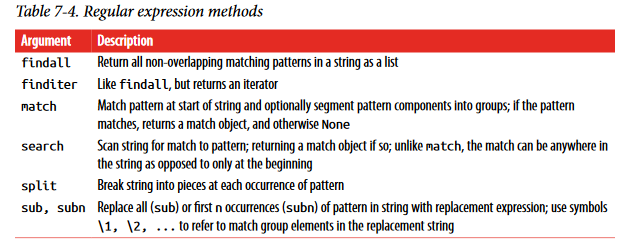

<b>Vectorized String Functions in Pandas

In [54]:
import numpy as np 
import pandas as pd
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com','Rob': 'rob@gmail.com', 'Wes': np.nan}

In [58]:
data
data = pd.Series(data)

In [59]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

You  can  apply  string  and  regular  expression  methods  can  be  applied  
(passing  a lambda  or  other  function)  to  each  value  using  data.map,  but  it  will  fail  on  the  NA(null)  values

To  cope  with  this,  Series  has  array-oriented  methods  for  string  opera‐tions that skip NA values. 

These are accessed through Series’s str attribute; for exam‐ple, we could check whether each email address has 'gmail' in it with str.contains

In [61]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [65]:
pattern='([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [66]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

There are a couple of ways to do vectorized element retrieval. Either use str.get or index into the str attribute

In [77]:
matches = data.str.match(pattern, flags=re.IGNORECASE)

In [78]:
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

To  access  elements  in  the  embedded  lists,  we  can  pass  an  index  to  either  of  thesefunctions

In [82]:
data.str.get(1)

Dave       a
Steve      t
Rob        o
Wes      NaN
dtype: object

In [81]:
data.str[0]

Dave       d
Steve      s
Rob        r
Wes      NaN
dtype: object

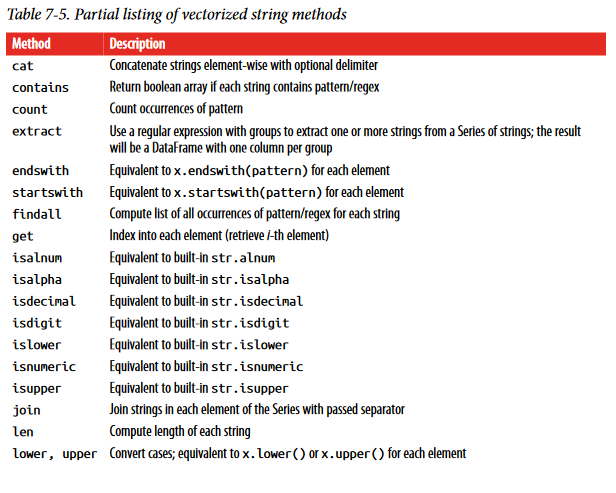
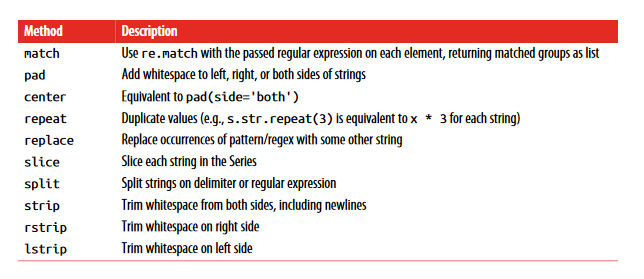